In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import json
import pandas as pd

# Spotify folder path
spotify_folder = '/content/drive/My Drive/210/Spotify Extended Streaming History'

# List all JSON files in the folder
json_files = [f for f in os.listdir(spotify_folder) if f.endswith('.json')]

# Combine all JSON files into a single DataFrame
spotify_dataframes = []
for file_name in json_files:
    file_path = os.path.join(spotify_folder, file_name)
    with open(file_path, 'r') as f:
        data = json.load(f)
        spotify_dataframes.append(pd.DataFrame(data))

# Concatenate all DataFrames
df_spotify = pd.concat(spotify_dataframes, ignore_index=True)

# Preview the combined Spotify data
print(df_spotify.head())


                     ts                 platform  ms_played conn_country  \
0  2022-04-29T18:44:15Z      OS X 12.0.1 [arm 2]     168182           TR   
1  2022-04-29T19:12:40Z  iOS 15.4.1 (iPhone13,2)      85286           TR   
2  2022-04-29T19:13:13Z      OS X 12.0.1 [arm 2]     165793           TR   
3  2022-04-29T19:17:48Z      OS X 12.0.1 [arm 2]     275840           TR   
4  2022-04-29T19:23:19Z      OS X 12.0.1 [arm 2]     234737           TR   

         ip_addr master_metadata_track_name master_metadata_album_artist_name  \
0  159.20.68.230                      Toxic                           Kehlani   
1  159.20.68.230      wRoNg (feat. Kehlani)                              ZAYN   
2  159.20.68.230                     Jungle                             Drake   
3  159.20.68.230              Know Yourself                             Drake   
4  159.20.68.230              Know Yourself                             Drake   

       master_metadata_album_album_name                 

In [3]:
import xml.etree.ElementTree as ET

# Path to the Apple Health XML file
apple_health_file = '/content/drive/My Drive/210/apple_health_export/dışa aktarılan.xml'

# Parse the XML file
tree = ET.parse(apple_health_file)
root = tree.getroot()

# Extract environmental audio exposure records
records = []
for record in root.findall('Record'):
    if record.attrib.get('type') == 'HKQuantityTypeIdentifierEnvironmentalAudioExposure':
        records.append({
            'date_time': record.attrib['startDate'],
            'decibels': float(record.attrib['value'])
        })

# Convert to a DataFrame
df_health = pd.DataFrame(records)

# Preview the health data
print(df_health.head())


Empty DataFrame
Columns: []
Index: []


In [4]:
# Read and print the first 500 characters of the XML file
with open('/content/drive/My Drive/210/apple_health_export/dışa aktarılan.xml', 'r') as f:
    content = f.read(500)
    print(content)


<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE HealthData [
<!-- HealthKit Export Version: 13 -->
<!ELEMENT HealthData (ExportDate,Me,(Record|Correlation|Workout|ActivitySummary|ClinicalRecord|Audiogram|VisionPrescription)*)>
<!ATTLIST HealthData
  locale CDATA #REQUIRED
>
<!ELEMENT ExportDate EMPTY>
<!ATTLIST ExportDate
  value CDATA #REQUIRED
>
<!ELEMENT Me EMPTY>
<!ATTLIST Me
  HKCharacteristicTypeIdentifierDateOfBirth                   CDATA #REQUIRED
  HKCharacteristicTypeIdentifierBiolog


In [5]:
import xml.etree.ElementTree as ET

# Path to the Apple Health XML file
apple_health_file = '/content/drive/My Drive/210/apple_health_export/dışa aktarılan.xml'

# Parse the XML file
tree = ET.parse(apple_health_file)
root = tree.getroot()

# Print attributes of the first few <Record> entries
for record in root.findall('Record'):
    print(record.attrib)  # Print all attributes of the <Record>
    break  # Stop after printing the first record


{'type': 'HKQuantityTypeIdentifierHeight', 'sourceName': '30 Gün Fit', 'sourceVersion': '1.0', 'unit': 'cm', 'creationDate': '2018-09-04 23:19:16 +0300', 'startDate': '2018-09-04 23:19:16 +0300', 'endDate': '2018-09-04 23:19:16 +0300', 'value': '170'}


In [6]:
# Extract environmental audio exposure records
records = []
for record in root.findall('Record'):
    # Check for audio exposure records
    if record.attrib.get('type') == 'HKQuantityTypeIdentifierEnvironmentalAudioExposure':
        records.append({
            'date_time': record.attrib['startDate'],
            'decibels': float(record.attrib['value'])
        })

# Convert to a DataFrame
import pandas as pd
df_health = pd.DataFrame(records)

# Preview the health data
print(df_health.head())


Empty DataFrame
Columns: []
Index: []


In [7]:
# Collect all unique 'type' attributes
types = set()
for record in root.findall('Record'):
    types.add(record.attrib.get('type'))

print(types)  # Print the unique types


{'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage', 'HKCategoryTypeIdentifierHeadphoneAudioExposureEvent', 'HKQuantityTypeIdentifierActiveEnergyBurned', 'HKQuantityTypeIdentifierAppleWalkingSteadiness', 'HKQuantityTypeIdentifierBasalEnergyBurned', 'HKQuantityTypeIdentifierHeight', 'HKQuantityTypeIdentifierWalkingSpeed', 'HKQuantityTypeIdentifierDistanceWalkingRunning', 'HKQuantityTypeIdentifierWalkingStepLength', 'HKQuantityTypeIdentifierFlightsClimbed', 'HKQuantityTypeIdentifierHeadphoneAudioExposure', 'HKQuantityTypeIdentifierStepCount', 'HKQuantityTypeIdentifierWalkingAsymmetryPercentage', 'HKQuantityTypeIdentifierBodyMass'}


In [8]:
import xml.etree.ElementTree as ET

# Path to the Apple Health XML file
apple_health_file = '/content/drive/My Drive/210/apple_health_export/dışa aktarılan.xml'

# Parse the XML file
tree = ET.parse(apple_health_file)
root = tree.getroot()
print("Apple Health data loaded successfully!")


Apple Health data loaded successfully!


In [9]:
# Extract headphone audio exposure records
records = []
for record in root.findall('Record'):
    if record.attrib.get('type') in ['HKCategoryTypeIdentifierHeadphoneAudioExposureEvent',
                                     'HKQuantityTypeIdentifierHeadphoneAudioExposure']:
        # Extract startDate
        date_time = record.attrib.get('startDate')

        # Check if the 'value' attribute is numeric
        value = record.attrib.get('value')
        try:
            decibels = float(value)  # Try converting 'value' to float
        except (ValueError, TypeError):
            decibels = None  # Set to None if it's not a number

        # Append the record
        records.append({
            'date_time': date_time,
            'decibels': decibels
        })

# Convert to a DataFrame
import pandas as pd
df_health = pd.DataFrame(records)

# Drop records with missing or invalid decibels (if necessary)
df_health = df_health.dropna(subset=['decibels'])

# Preview the health data
print(df_health.head())



                   date_time  decibels
0  2020-03-20 23:51:01 +0300   51.5578
1  2020-03-21 00:07:08 +0300   57.0233
2  2020-03-21 00:07:19 +0300   56.4170
3  2020-03-21 00:07:22 +0300   51.9303
4  2020-03-21 00:08:15 +0300   37.4647


In [10]:
df_health.to_csv('/content/drive/My Drive/210/apple_health_export/headphone_audio_exposure_cleaned.csv', index=False)
print("Extracted and cleaned health data saved successfully!")


Extracted and cleaned health data saved successfully!


In [11]:
# Ensure Spotify timestamps are datetime and set to UTC
df_spotify['ts'] = pd.to_datetime(df_spotify['ts']).dt.tz_convert('UTC')

# Ensure Health timestamps are datetime and set to UTC
df_health['date_time'] = pd.to_datetime(df_health['date_time']).dt.tz_convert('UTC')

# Sort the DataFrames by timestamps
df_spotify = df_spotify.sort_values('ts')
df_health = df_health.sort_values('date_time')

# Merge Spotify and health data with a time tolerance of 5 minutes
merged_df = pd.merge_asof(
    df_spotify,
    df_health,
    left_on='ts',
    right_on='date_time',
    direction='nearest',
    tolerance=pd.Timedelta(minutes=5)  # Set tolerance to 5 minutes
)

# Drop rows without a match
merged_df = merged_df.dropna(subset=['decibels'])

# Preview the merged DataFrame
print(merged_df.head())


                           ts                platform  ms_played conn_country  \
123 2020-04-06 12:30:13+00:00  iOS 13.3.1 (iPhone9,3)      95992           TR   
124 2020-04-06 12:31:30+00:00  iOS 13.3.1 (iPhone9,3)      73423           TR   
273 2020-04-07 10:58:05+00:00  iOS 13.3.1 (iPhone9,3)       3096           TR   
274 2020-04-07 11:00:55+00:00  iOS 13.3.1 (iPhone9,3)     169367           TR   
283 2020-04-07 20:04:19+00:00  iOS 13.3.1 (iPhone9,3)      57396           TR   

           ip_addr master_metadata_track_name  \
123  78.171.82.139                       Blow   
124  78.171.82.139                       Blow   
273  78.171.82.139       lovely (with Khalid)   
274  78.171.82.139                       Blow   
283  78.171.82.139                Amber Alert   

    master_metadata_album_artist_name master_metadata_album_album_name  \
123                          Ashnikko                       Unlikeable   
124                          Ashnikko                       Unlikeable

In [12]:
print(merged_df.columns)


Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode', 'date_time', 'decibels'],
      dtype='object')


In [13]:
# Update artist_column to the correct column name
artist_column = 'master_metadata_album_artist_name'

# Group by artist and calculate the average decibels
artist_decibel_stats = merged_df.groupby(artist_column)['decibels'].mean().sort_values(ascending=False)

# Save the results to a CSV
artist_decibel_stats.to_csv('/content/drive/My Drive/210/artist_decibel_stats.csv', header=['average_decibels'])

# Display the top 10 loudest artists
print("Top 10 Loudest Artists:")
print(artist_decibel_stats.head(10))

# Display the top 10 quietest artists
print("\nTop 10 Quietest Artists:")
print(artist_decibel_stats.tail(10))


Top 10 Loudest Artists:
master_metadata_album_artist_name
sped up tiktok audios       98.24420
creamy                      98.24420
Halil Koçak                 96.56370
Ayna                        96.44095
Bob Marley & The Wailers    96.16240
Bill Withers                96.16240
Édith Piaf                  96.16240
Gnarls Barkley              96.16240
Dynoro                      95.76920
Flört                       95.75740
Name: decibels, dtype: float64

Top 10 Quietest Artists:
master_metadata_album_artist_name
Merk & Kremont    0.507893
Dean Lewis        0.136620
Waq1ux            0.000000
Yellow Days       0.000000
Oliver Tree       0.000000
Ren0wned          0.000000
Zouj              0.000000
Roosevelt         0.000000
Maritssa          0.000000
Tom Grennan       0.000000
Name: decibels, dtype: float64


In [14]:
# Filter out artists with zero decibels
artist_decibel_stats = artist_decibel_stats[artist_decibel_stats > 0]

# Save the filtered results to a CSV
artist_decibel_stats.to_csv('/content/drive/My Drive/210/filtered_artist_decibel_stats.csv', header=['average_decibels'])

# Display the top 10 loudest artists
print("Top 10 Loudest Artists:")
print(artist_decibel_stats.head(10))

# Display the top 10 quietest artists
print("\nTop 10 Quietest Artists:")
print(artist_decibel_stats.tail(10))


Top 10 Loudest Artists:
master_metadata_album_artist_name
sped up tiktok audios       98.24420
creamy                      98.24420
Halil Koçak                 96.56370
Ayna                        96.44095
Bob Marley & The Wailers    96.16240
Bill Withers                96.16240
Édith Piaf                  96.16240
Gnarls Barkley              96.16240
Dynoro                      95.76920
Flört                       95.75740
Name: decibels, dtype: float64

Top 10 Quietest Artists:
master_metadata_album_artist_name
Mike Gudmann                                        7.249120
Helion                                              7.249120
Klaas                                               7.249120
Deep Sleep Music Collective                         6.994024
Redd                                                3.792130
Lucid Dreaming World-Collective Unconscious Mind    3.331580
Matthew Kocel                                       3.331580
Kreayshawn                                          0.

In [38]:
# Step 1: Calculate Frequency Data
# Group by artist and count the number of tracks listened to (frequency)
artist_frequency = (
    merged_df.groupby("master_metadata_album_artist_name")  # Replace with correct artist column name in merged_df
    .size()
    .reset_index(name="frequency")
)

# Step 2: Merge Frequency Data with Decibel Stats
# Calculate average decibels for each artist
artist_decibels = (
    merged_df.groupby("master_metadata_album_artist_name")["decibels"]  # Replace with correct decibel column name
    .mean()
    .reset_index(name="average_decibels")
)

# Merge frequency and decibel data
artist_stats = pd.merge(artist_decibels, artist_frequency, on="master_metadata_album_artist_name")

# Step 3: Sort Data for Visualization
# Sort by frequency and reset index for cleaner table
artist_stats = artist_stats.sort_values(by="frequency", ascending=False).reset_index(drop=True)

# Save to a CSV for reference
artist_stats.to_csv('/content/drive/My Drive/210/artist_stats_with_frequency.csv', index=False)

# Display the resulting table
print(artist_stats.head(10))  # Display top 10 artists


  master_metadata_album_artist_name  average_decibels  frequency
0                      Travis Scott         65.617614       1984
1                           Lil Zey         71.322078       1044
2                      Metro Boomin         67.541866        668
3                        The Weeknd         66.407322        626
4                          Doja Cat         52.818496        621
5                             Drake         65.465566        482
6                     Ariana Grande         49.647765        477
7                     Justin Bieber         50.314619        475
8                     Billie Eilish         53.474088        431
9                             cakal         72.029492        421


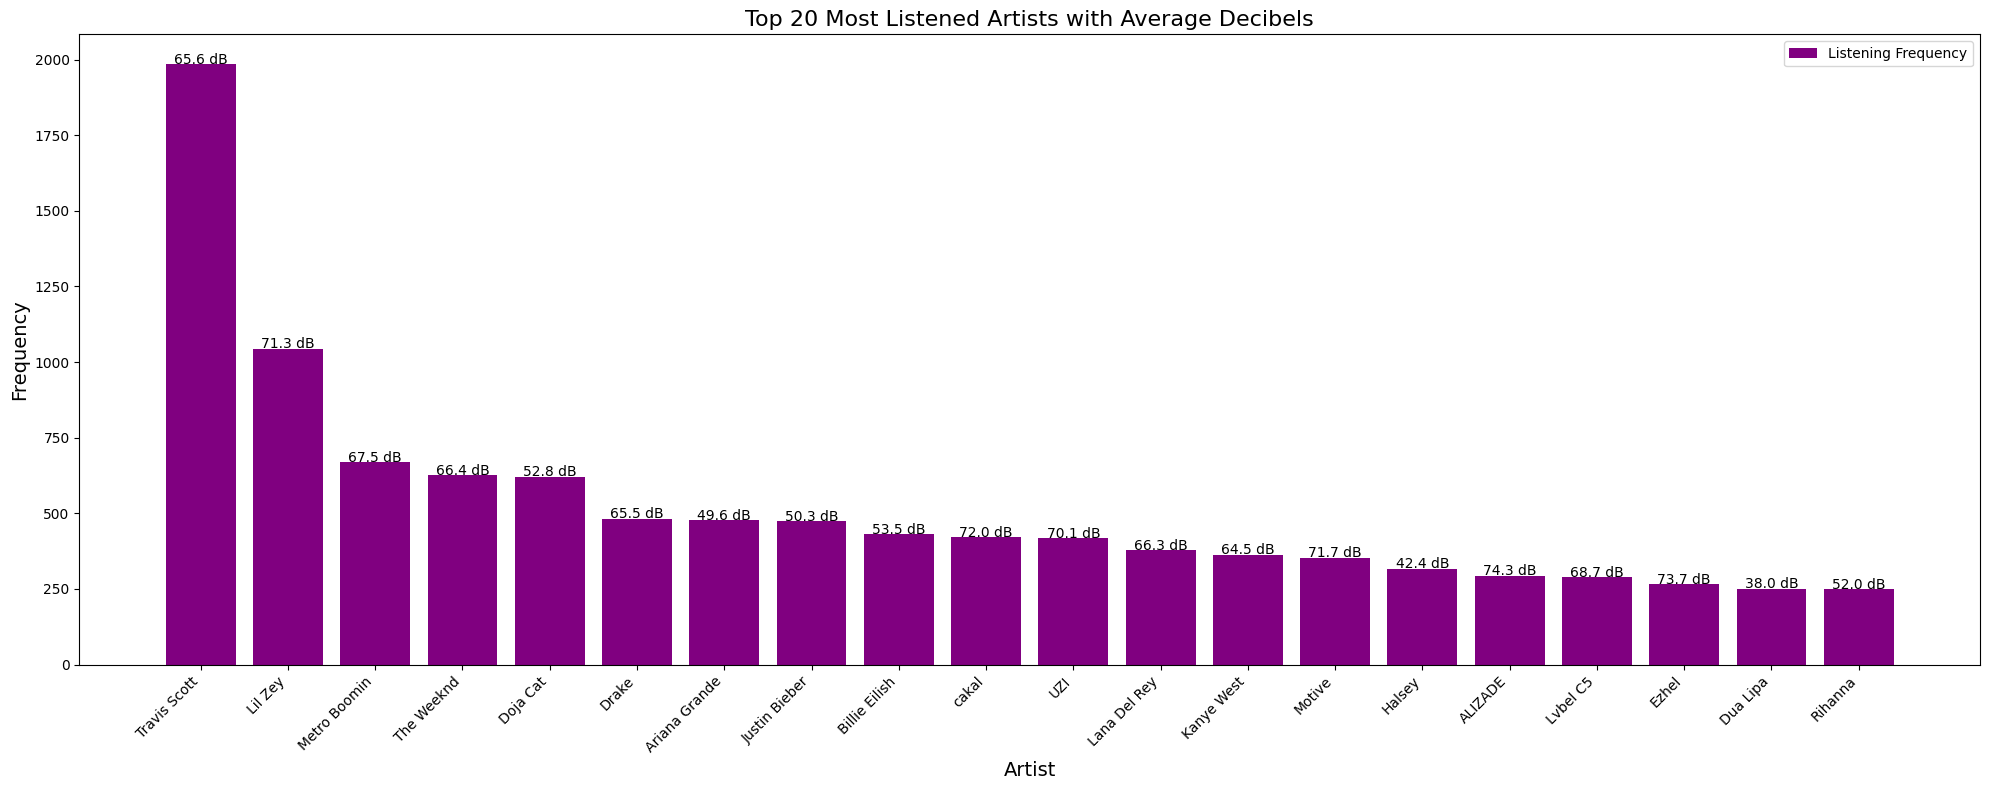

In [39]:
# Step 4: Visualize Most Frequently Listened Artists with Decibels
top_artists = artist_stats.head(20)  # Top 20 most listened artists

plt.figure(figsize=(20, 8))

# Plot frequency as bar heights
bars = plt.bar(
    top_artists["master_metadata_album_artist_name"],
    top_artists["frequency"],
    color="purple",
    label="Listening Frequency"
)

# Add decibels as labels on top of bars
for bar, decibel in zip(bars, top_artists["average_decibels"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{decibel:.1f} dB",
        ha="center",
        fontsize=10
    )

# Add titles and labels
plt.title("Top 20 Most Listened Artists with Average Decibels", fontsize=16)
plt.xlabel("Artist", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.legend()
plt.show()


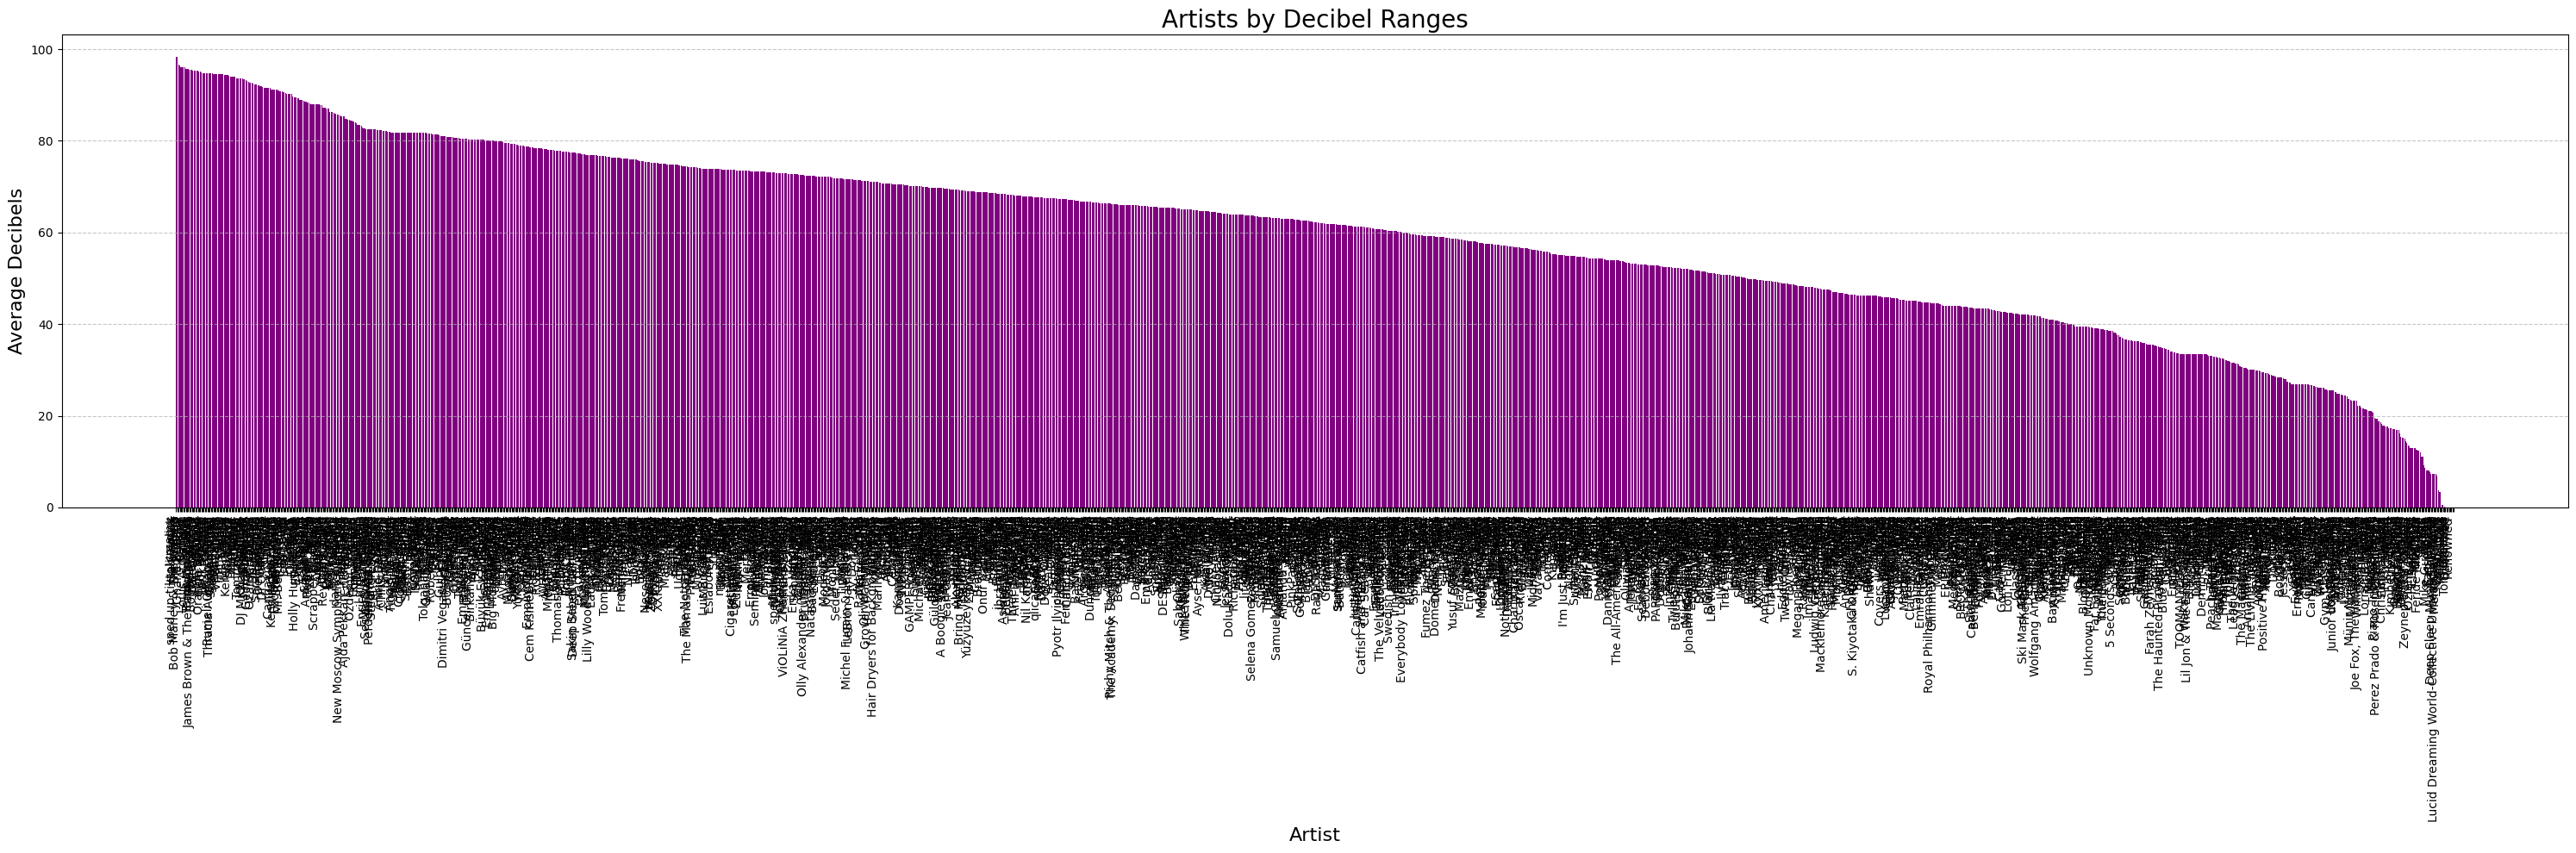

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and process the data
# Assuming `artist_stats` is already prepared as the DataFrame with frequency and decibels
artist_stats = pd.read_csv('/content/artist_stats_with_frequency.csv')  # Adjust path if necessary

# Step 2: Sort the data by frequency or decibels, as per your preference
# For this example, we sort by decibels in descending order
artist_stats = artist_stats.sort_values(by='average_decibels', ascending=False)

# Step 3: Create the bar chart
plt.figure(figsize=(30, 10))  # Adjust size for readability

# Plot the average decibels for each artist
bars = plt.bar(
    artist_stats['master_metadata_album_artist_name'],  # Artist names
    artist_stats['average_decibels'],  # Decibel values
    color='purple'
)

# Add titles and labels
plt.title('Artists by Decibel Ranges', fontsize=20)
plt.xlabel('Artist', fontsize=16)
plt.ylabel('Average Decibels', fontsize=16)

# Rotate x-axis labels to make them readable
plt.xticks(
    range(len(artist_stats['master_metadata_album_artist_name'])),
    artist_stats['master_metadata_album_artist_name'],
    rotation=90,
    fontsize=10,
    ha='right'
)

# Add grid lines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the chart
plt.show()


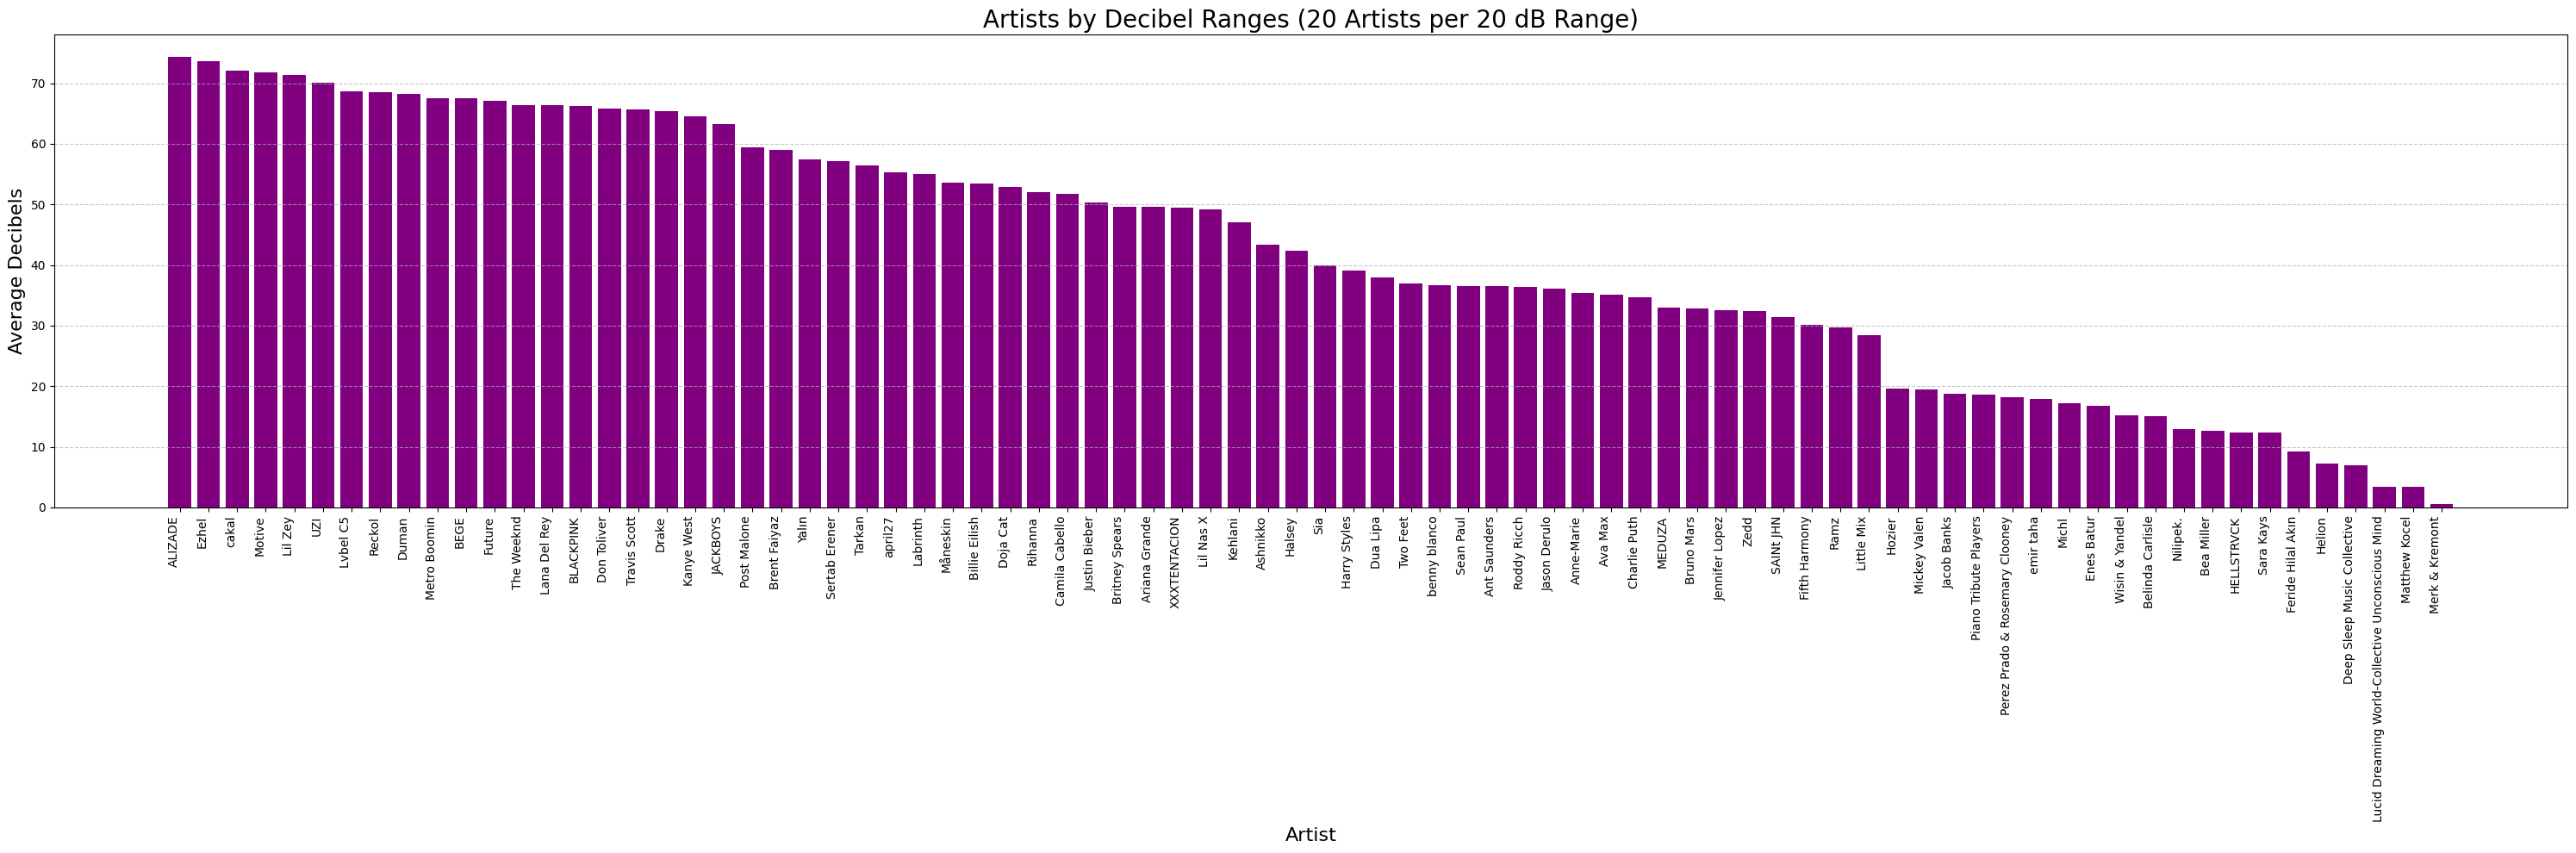

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and process the data
artist_stats = pd.read_csv('/content/artist_stats_with_frequency.csv')  # Adjust path if necessary

# Step 2: Define a function to sample artists within each decibel range
def sample_artists_by_decibel_range(df, upper, lower, n):
    # Filter artists within the given decibel range
    filtered = df[(df['average_decibels'] <= upper) & (df['average_decibels'] > lower)]
    # Sort by frequency (or any other metric, if preferred)
    filtered = filtered.sort_values(by='frequency', ascending=False)
    # Select up to n artists, or all if fewer
    return filtered.head(n)

# Step 3: Define decibel ranges and sample artists
ranges = [
    (80, 60),  # 80-60 dB
    (60, 40),  # 60-40 dB
    (40, 20),  # 40-20 dB
    (20, 0)    # 20-0 dB
]
sampled_artists = pd.DataFrame()

for upper, lower in ranges:
    sampled_artists = pd.concat([
        sampled_artists,
        sample_artists_by_decibel_range(artist_stats, upper, lower, n=20)
    ])

# Step 4: Sort the sampled artists by decibels for plotting
sampled_artists = sampled_artists.sort_values(by='average_decibels', ascending=False)

# Step 5: Create the bar chart
plt.figure(figsize=(30, 10))  # Adjust size for readability

bars = plt.bar(
    sampled_artists['master_metadata_album_artist_name'],  # Artist names
    sampled_artists['average_decibels'],  # Decibel values
    color='purple'
)

# Add titles and labels
plt.title('Artists by Decibel Ranges (20 Artists per 20 dB Range)', fontsize=20)
plt.xlabel('Artist', fontsize=16)
plt.ylabel('Average Decibels', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(
    range(len(sampled_artists['master_metadata_album_artist_name'])),
    sampled_artists['master_metadata_album_artist_name'],
    rotation=90,
    fontsize=10,
    ha='right'
)

# Add grid lines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the chart
plt.show()


Top 10 Most Frequently Listened and Loudest Artists:
  master_metadata_album_artist_name  average_decibels  frequency
0                      Travis Scott         65.617614       1984
1                           Lil Zey         71.322078       1044
2                      Metro Boomin         67.541866        668
3                        The Weeknd         66.407322        626
4                          Doja Cat         52.818496        621
5                             Drake         65.465566        482
6                     Ariana Grande         49.647765        477
7                     Justin Bieber         50.314619        475
8                     Billie Eilish         53.474088        431
9                             cakal         72.029492        421


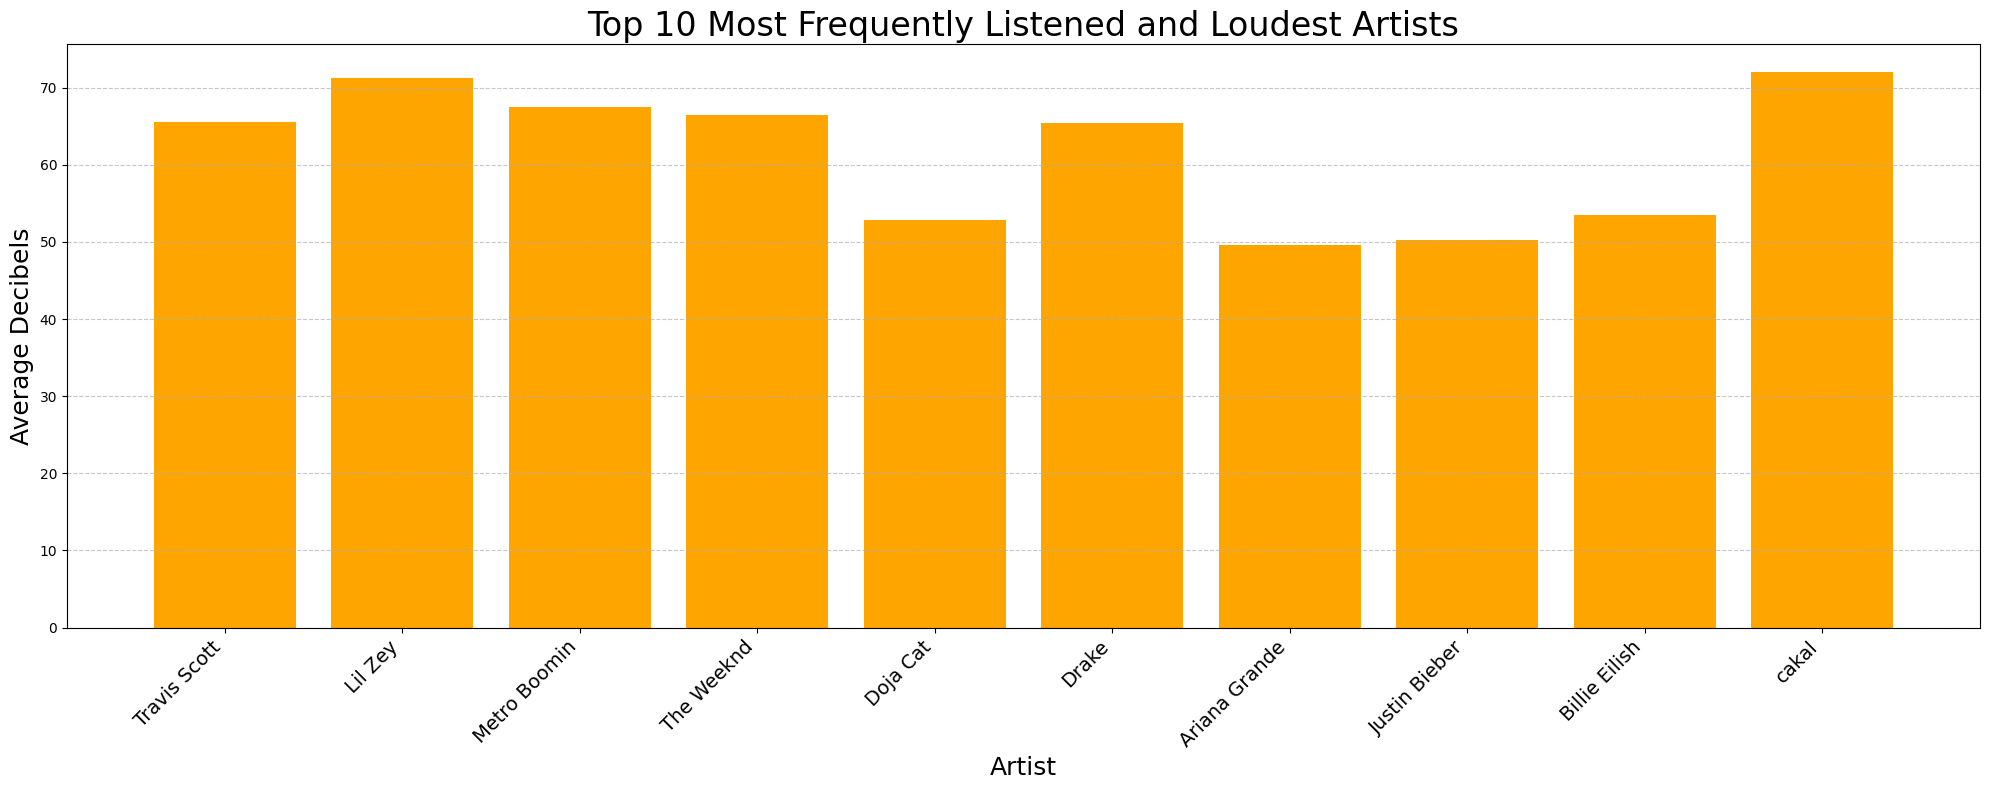

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
artist_stats = pd.read_csv('/content/artist_stats_with_frequency.csv')  # Adjust the path if necessary

# Step 2: Sort by frequency first, then by average decibels
top_artists = artist_stats.sort_values(by=['frequency', 'average_decibels'], ascending=[False, False]).head(10)

# Display the top 10 artists
print("Top 10 Most Frequently Listened and Loudest Artists:")
print(top_artists[['master_metadata_album_artist_name', 'average_decibels', 'frequency']])

# Step 3: Plot the top 10 artists
plt.figure(figsize=(20, 8))
plt.bar(top_artists['master_metadata_album_artist_name'], top_artists['average_decibels'], color='orange')

# Add titles and labels
plt.title('Top 10 Most Frequently Listened and Loudest Artists', fontsize=24)
plt.xlabel('Artist', fontsize=18)
plt.ylabel('Average Decibels', fontsize=18)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Add grid lines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap and show the chart
plt.tight_layout()
plt.show()


Top 10 Most Frequently Listened and Quietest Artists:
    master_metadata_album_artist_name  average_decibels  frequency
493       Deep Sleep Music Collective          6.994024          8
612                 Feride Hilal Akın          9.158310          6
872                        HELLSTRVCK         12.331380          3
661                        Bea Miller         12.642242          5
869                    Wisin & Yandel         15.166853          3
795    Perez Prado & Rosemary Clooney         18.248300          3
871                       Jacob Banks         18.714030          3
527                            Hozier         19.603099          7
683                             Şenay         20.708604          5
648                            Honors         21.125129          5


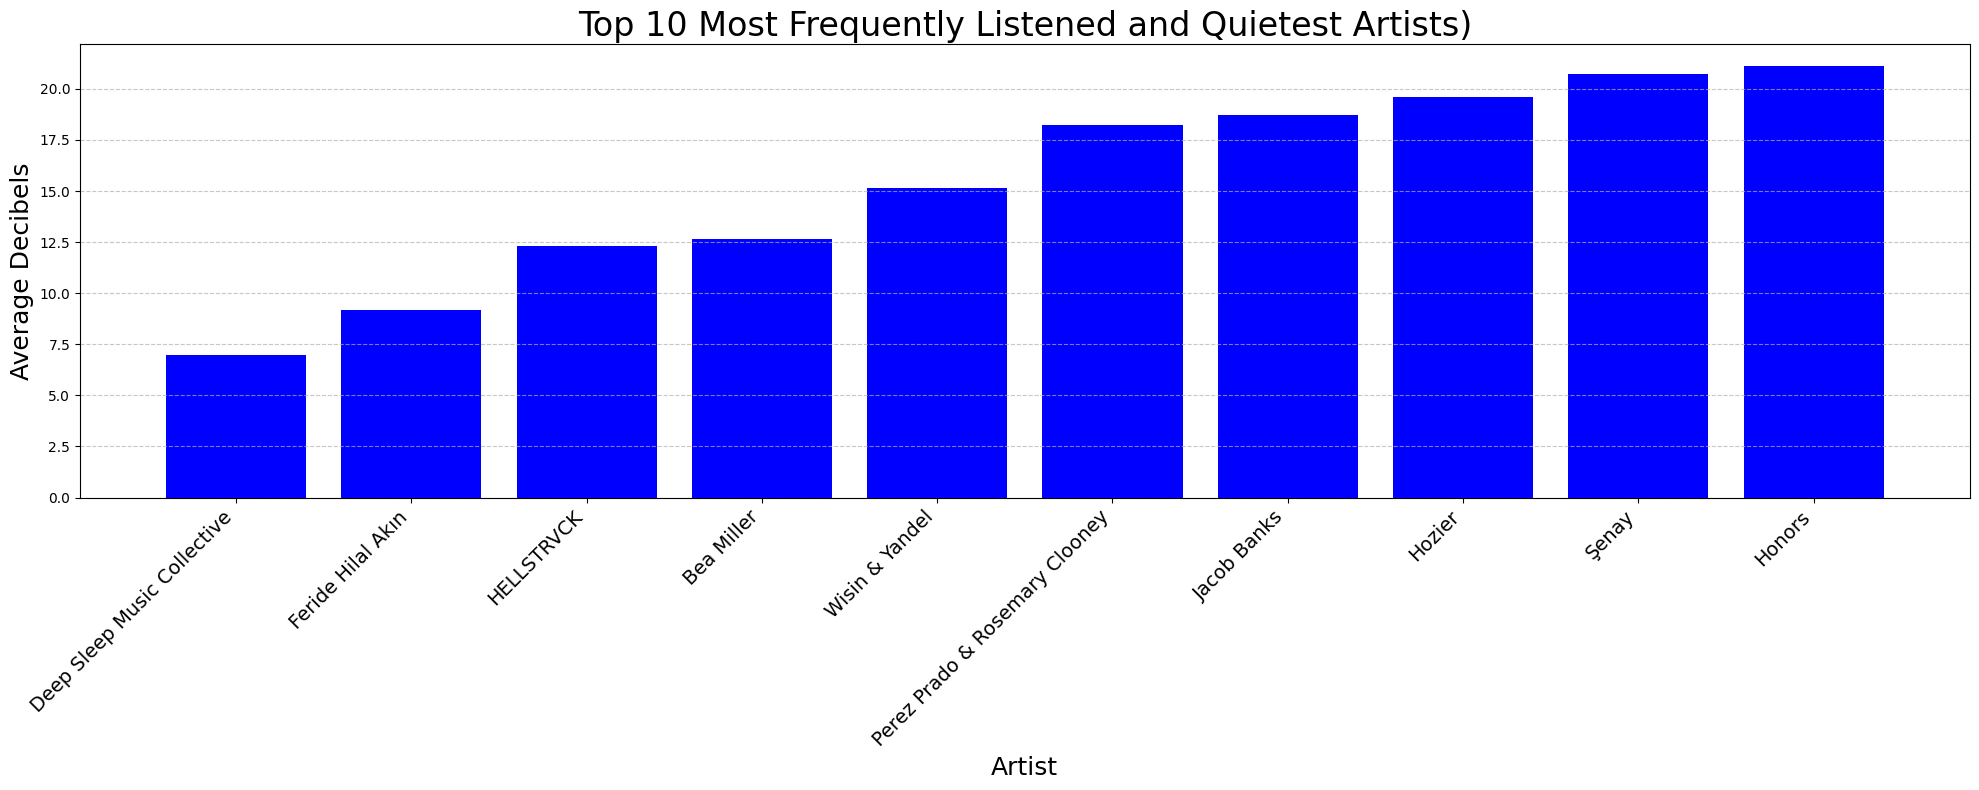

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
artist_stats = pd.read_csv('/content/artist_stats_with_frequency.csv')  # Adjust the path if necessary

# Step 2: Filter for artists with frequency >= 5
artist_stats = artist_stats[artist_stats['frequency'] >= 3]

# Step 3: Sort by decibels (ascending) and then by frequency (descending)
top_quietest_artists = artist_stats.sort_values(by=['average_decibels', 'frequency'], ascending=[True, False]).head(10)

# Display the top 10 artists
print("Top 10 Most Frequently Listened and Quietest Artists:")
print(top_quietest_artists[['master_metadata_album_artist_name', 'average_decibels', 'frequency']])

# Step 4: Plot the top 10 artists
plt.figure(figsize=(20, 8))
plt.bar(top_quietest_artists['master_metadata_album_artist_name'], top_quietest_artists['average_decibels'], color='blue')

# Add titles and labels
plt.title('Top 10 Most Frequently Listened and Quietest Artists)', fontsize=24)
plt.xlabel('Artist', fontsize=18)
plt.ylabel('Average Decibels', fontsize=18)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Add grid lines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap and show the chart
plt.tight_layout()
plt.show()


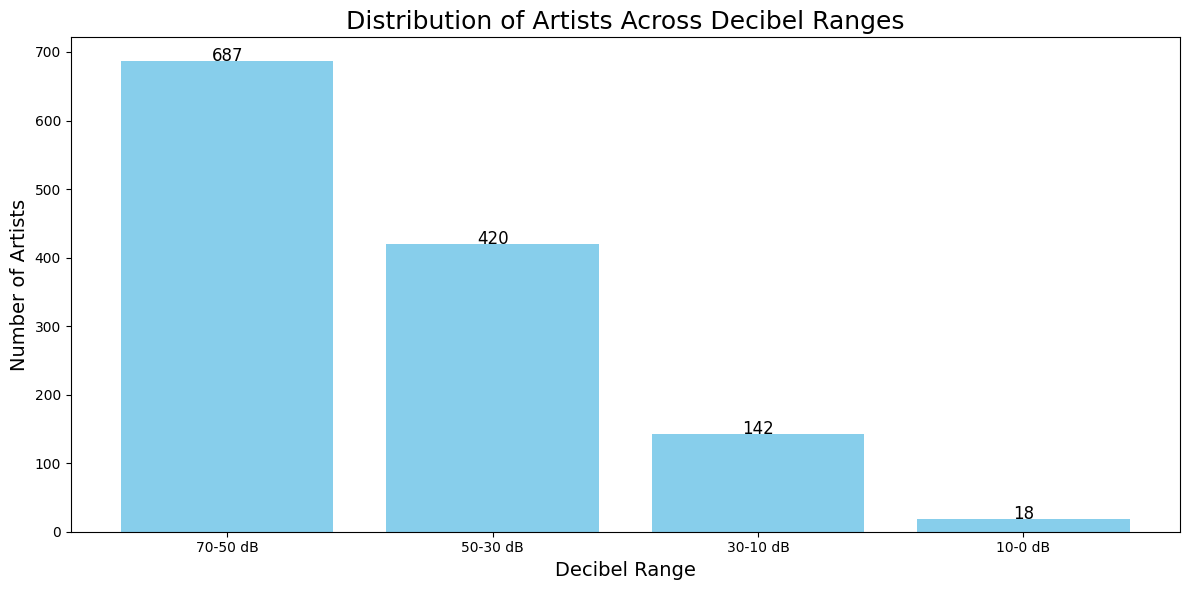

In [81]:
# Group artists by decibel ranges
decibel_ranges = {
    '70-50 dB': len(artist_decibel_stats[(artist_decibel_stats['decibels'] <= 70) & (artist_decibel_stats['decibels'] > 50)]),
    '50-30 dB': len(artist_decibel_stats[(artist_decibel_stats['decibels'] <= 50) & (artist_decibel_stats['decibels'] > 30)]),
    '30-10 dB': len(artist_decibel_stats[(artist_decibel_stats['decibels'] <= 30) & (artist_decibel_stats['decibels'] > 10)]),
    '10-0 dB': len(artist_decibel_stats[(artist_decibel_stats['decibels'] <= 10) & (artist_decibel_stats['decibels'] > 0)]),
}

# Create a bar chart for the distribution
plt.figure(figsize=(12, 6))
plt.bar(decibel_ranges.keys(), decibel_ranges.values(), color='skyblue')

# Add titles and labels
plt.title('Distribution of Artists Across Decibel Ranges', fontsize=18)
plt.xlabel('Decibel Range', fontsize=14)
plt.ylabel('Number of Artists', fontsize=14)

# Add values on top of bars
for i, v in enumerate(decibel_ranges.values()):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


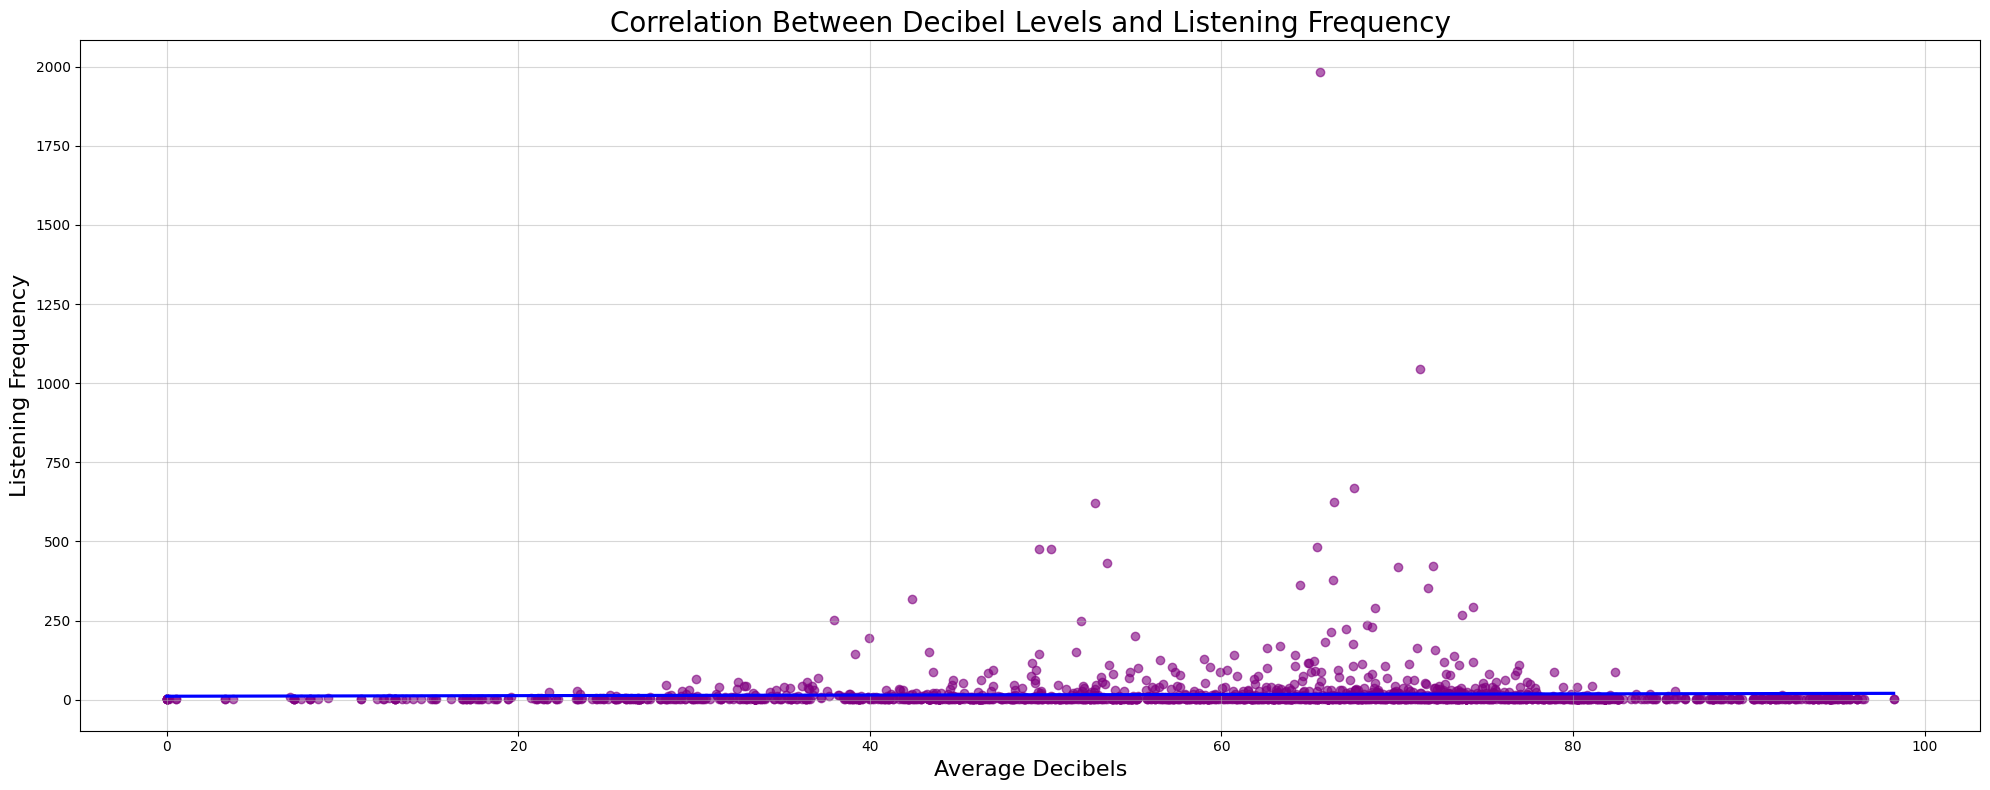

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the data is properly loaded
# 'artist_stats' is assumed to have 'average_decibels' and 'frequency' columns

# Step 1: Create the scatter plot with regression line
plt.figure(figsize=(20, 8))  # Increase the width for better visualization
sns.regplot(
    x=artist_stats['average_decibels'],  # Use the average decibels column
    y=artist_stats['frequency'],         # Use the frequency column
    scatter_kws={'color': 'purple', 'alpha': 0.6},  # Customization for scatter points
    line_kws={'color': 'blue'}                        # Customization for regression line
)

# Step 2: Add titles and labels
plt.title('Correlation Between Decibel Levels and Listening Frequency', fontsize=20)  # Larger title
plt.xlabel('Average Decibels', fontsize=16)
plt.ylabel('Listening Frequency', fontsize=16)

# Step 3: Add grid lines for better readability
plt.grid(alpha=0.5)

# Step 4: Show the plot
plt.tight_layout()
plt.show()


<ipython-input-57-a751e1b5a2cd>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_spotify.groupby([df_spotify['ts'].dt.date, decibel_ranges]).size().reset_index(name='frequency')


<Figure size 2000x1000 with 0 Axes>

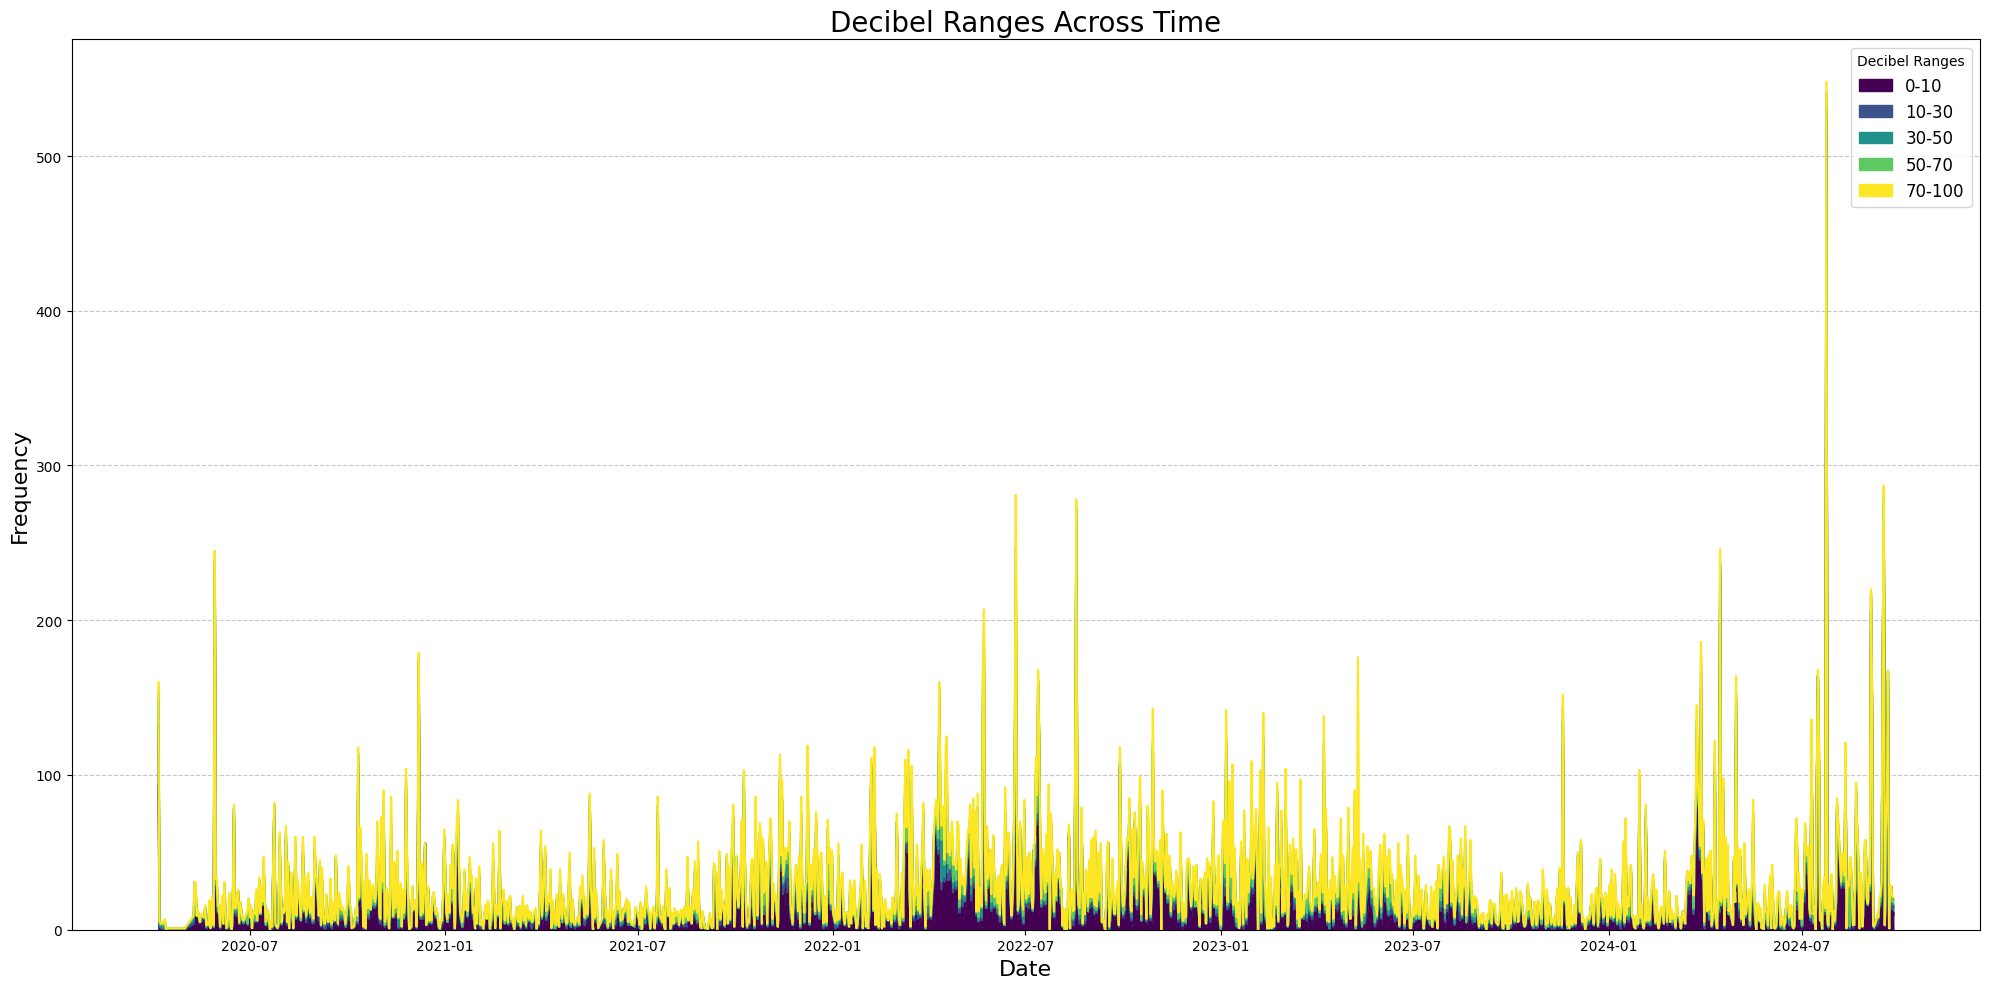

In [57]:
import matplotlib.pyplot as plt

# Step 1: Extract necessary columns and ensure proper data types
df_spotify['ts'] = pd.to_datetime(df_spotify['ts'])  # Convert timestamp to datetime
df_spotify['decibels'] = df_spotify['ms_played'] / 1000  # Example calculation for decibels if not directly available

# Step 2: Group by decibel ranges and time
decibel_ranges = pd.cut(df_spotify['decibels'], bins=[0, 10, 30, 50, 70, 100], labels=['0-10', '10-30', '30-50', '50-70', '70-100'])
grouped_data = df_spotify.groupby([df_spotify['ts'].dt.date, decibel_ranges]).size().reset_index(name='frequency')

# Step 3: Pivot data for plotting
pivot_data = grouped_data.pivot(index='ts', columns='decibels', values='frequency').fillna(0)

# Step 4: Plot the data
plt.figure(figsize=(20, 10))
pivot_data.plot(kind='area', stacked=True, figsize=(20, 10), colormap='viridis')

# Step 5: Add labels, title, and adjust
plt.title('Decibel Ranges Across Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(title='Decibel Ranges', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [64]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Load the data
artist_stats = pd.read_csv('/content/artist_stats_with_frequency.csv')  # Adjust the path if necessary

# Extract the relevant columns
decibels = artist_stats['average_decibels']
frequency = artist_stats['frequency']

# Perform Pearson Correlation Test
pearson_corr, pearson_p = pearsonr(decibels, frequency)
print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"Pearson P-value: {pearson_p:.4e}")

# Decision for Pearson
if pearson_p < 0.05:
    print("Reject H₀: There is a significant dependency between decibel levels and listening frequency (Pearson).")
else:
    print("Fail to reject H₀: No significant dependency between decibel levels and listening frequency (Pearson).")

# Perform Spearman Correlation Test
spearman_corr, spearman_p = spearmanr(decibels, frequency)
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman P-value: {spearman_p:.4e}")

# Decision for Spearman
if spearman_p < 0.05:
    print("Reject H₀: There is a significant dependency between decibel levels and listening frequency (Spearman).")
else:
    print("Fail to reject H₀: No significant dependency between decibel levels and listening frequency (Spearman).")


Pearson Correlation Coefficient: 0.0260
Pearson P-value: 2.5730e-01
Fail to reject H₀: No significant dependency between decibel levels and listening frequency (Pearson).
Spearman Correlation Coefficient: 0.0204
Spearman P-value: 3.7473e-01
Fail to reject H₀: No significant dependency between decibel levels and listening frequency (Spearman).


In [66]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the data
artist_stats = pd.read_csv('/content/artist_stats_with_frequency.csv')  # Adjust the path if necessary

# Define bins for decibels and frequency
# Decibel bins increment by 1 unit
decibel_bins = np.arange(0, artist_stats['average_decibels'].max() + 2, 1)  # Add 1 to include the upper bound
frequency_bins = [0, 10, 50, 100, 200, 500, np.inf]  # Frequency bins remain unchanged

# Add binned categories to the DataFrame
artist_stats['decibel_range'] = pd.cut(artist_stats['average_decibels'], bins=decibel_bins)
artist_stats['frequency_range'] = pd.cut(artist_stats['frequency'], bins=frequency_bins)

# Create a contingency table
contingency_table = pd.crosstab(artist_stats['decibel_range'], artist_stats['frequency_range'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")
print(f"Degrees of Freedom: {dof}")

# Decision
if p < 0.05:
    print("Reject H₀: There is a significant dependency between decibel ranges and listening frequency ranges.")
else:
    print("Fail to reject H₀: No significant dependency between decibel ranges and listening frequency ranges.")


Chi-Square Statistic: 422.1287
P-value: 8.9661e-01
Degrees of Freedom: 460
Fail to reject H₀: No significant dependency between decibel ranges and listening frequency ranges.
